In [1]:
from model.test import train
from dataset import *
from tools import evaluate

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder 
from sklearn.cluster import KMeans, BisectingKMeans, Birch, SpectralClustering, AgglomerativeClustering, FeatureAgglomeration

result = [[[], [], []], [[], [], []], [[], [], []]]
sectionid = '151507'

/mnt/5280e/twang/.conda/envs/torch+pyg/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


>>> dataset name: dlpfc, slice id: 151507, size: (4226, 33538), cluster: 7.
>>> The graph contains 28996 edges, average 6.861334595362044 edges per node.
>>> Building spatial graph success!
>>> use louvain to modify spatial graph
         Falling back to preprocessing with `sc.pp.pca` and default params.


2022-11-01 10:46:29.395112: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-01 10:46:29.552773: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


>>> finish louvain, begin to prune graph
>>> pruned graph contains 24658 edges, average 5.834831992427827 edges per node.


>>> node2vec: 100%|██████████| 200/200 [01:58<00:00,  1.68it/s]


>>> spatial model data(features) size: (4226, 3000)


>>> training spatial model: 100%|██████████| 500/500 [00:05<00:00, 87.38it/s]


>>> Birch: 47.1589


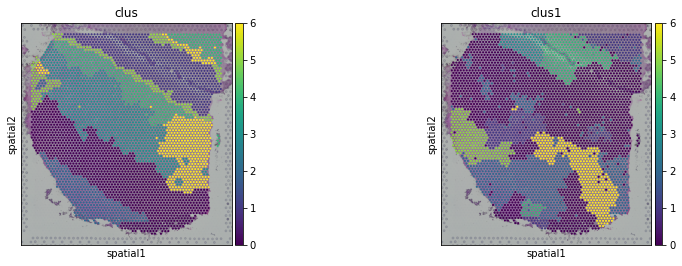

In [2]:
adata, n_cluster = get_dlpfc_data(sectionid)
train(adata, lr=1e-3, radius=150, node2vec_p=1, node2vec_q=1, louvain_resolution=.4, components_features=30, walk_length=45)

label = LabelEncoder().fit_transform(adata.obs['cluster'])
pred = LabelEncoder().fit_transform([str(x) for x in Birch(n_clusters=n_cluster).fit(adata.obsm['embedding']).predict(adata.obsm['embedding'])])
pred1 = LabelEncoder().fit_transform([str(x) for x in Birch(n_clusters=n_cluster).fit(adata.obsm['spatial_embedding']).predict(adata.obsm['spatial_embedding'])])
ari_score = metrics.adjusted_rand_score(label, pred) * 100
print('>>> %s: %.4f' % ('Birch', ari_score))
adata.obs['clus'] = pred
adata.obs['clus1'] = pred1
sc.pl.spatial(adata, color=['clus', 'clus1'])